In [ ]:
from pytorch_lightning.loggers.neptune import NeptuneLogger
import os
import os 
import sys 
sys.path.insert(0, os.getcwd())
sys.path.append(os.path.join('/home/jonfrey/ASL' + '/src'))

logger = NeptuneLogger(
          api_key=os.environ["NEPTUNE_API_TOKEN"],
          project_name="jonasfrey96/asl",
          experiment_id='ASL-591',
          close_after_fit = False,
        )

In [13]:
# STD
import os
import copy 
import io

# MISC
import numpy as np
import torch 
import imageio
import cv2
from PIL import Image, ImageDraw, ImageFont

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvasAgg

def plot_matrix( data_matrix, higher_is_better= True, title='TitleNotDefined',max_tasks=None, max_tests= None,
                  label_x=None, label_y=None, *args,**kwargs):

    if max_tasks is None and max_tests is None:
            max_tasks = data_matrix.shape[0]
            max_tests = data_matrix.shape[1]
    else:
        d1 = data_matrix.shape[0]
        d2 = data_matrix.shape[1]
        assert d2 <= max_tests
        data = np.zeros( (max_tasks, max_tests))
        if max_tasks > d1:
            
            data[:d1,:d2] = data_matrix
        else:
            data[:max_tasks,:d2] = data_matrix[:max_tasks,:d2]

        data_matrix = data
    
    if label_y is None:
        label_y = ["Task  "+str( i) for i in range(max_tasks)]
    if label_x is None:
        label_x = ["Test "+str(i) for i in range(max_tests)]
    
    fig, ax = plt.subplots()
    if higher_is_better:
      im = ax.imshow(data_matrix,cmap=cm.get_cmap('PiYG')  )
    else:
      im = ax.imshow(data_matrix,cmap=cm.get_cmap('PiYG_r')  )

    
    from matplotlib.colors import LinearSegmentedColormap
    col = { "red":[255,89,94],
     "green":[138,201,38]}
    da = {}
    for k in col.keys():
        da[k] = [l/255 for l in col[k]]
    red2green = LinearSegmentedColormap.from_li("r2g", da, N=256, gamma=1.0)
    im = ax.imshow(data_matrix,cmap=red2green  )

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(label_x)))
    ax.set_yticks(np.arange(len(label_y)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(label_x)
    ax.set_yticklabels(label_y)

    # Rotate the tick labels and set their alignment.

    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
              rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(len(label_x)):
        for j in range(len(label_y)):
            text = ax.text(i,j, data_matrix[j,i], 
                           ha="center", va="center", color="w",
                          fontdict = {'backgroundcolor':(0,0,0,0.2)})

    ax.set_title(title)
    #fig.tight_layout()
#     arr = get_img_from_fig(fig, dpi=600)
#     display(fig)
#     plt.close()
#     return np.uint8(arr)

data = np.eye(4)
data[:2,:1] = 0.2
plot_matrix(  data)

ValueError: data must be nx3 format

<Figure size 432x288 with 1 Axes>

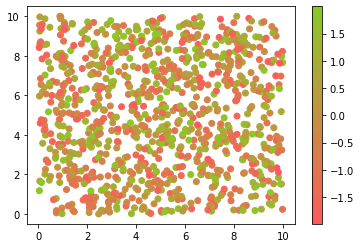

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

col = { "red":[255,89,94],
     "green":[138,201,38]}
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('red'), c('violet'), 0.33, c('violet'), c('blue'), 0.66, c('blue')])

rvb = make_colormap(
    [ [l/255 for l in [255,89,94] ], [l/255 for l in [138,201,38] ]])

N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
plt.colorbar()
plt.show()

In [15]:
c('red')

(1.0, 0.0, 0.0)

In [2]:
import numpy as np
from matplotlib import cm

# col = { "red":[255,89,94],
#  "green":[138,201,38]}

# li = [ [*(v),255] for v in col.values()]
# li = (np.array(li)/255).tolist()
# COL_MAP = cm.colors.ListedColormap(li)






In [ ]:
from visu import MainVisualizer
import numpy as np

main_visu = MainVisualizer( p_visu = '/home/jonfrey/tmp', 
                        logger=logger.experiment, epoch=3, store=True, num_classes=41 ) #logger.experiment





In [ ]:
def validation_acc_plot(main_visu, logger):
  try:
    df_acc = logger.experiment.get_numeric_channels_values('val_acc/dataloader_idx_0','val_acc/dataloader_idx_1','val_acc/dataloader_idx_2','val_acc/dataloader_idx_3','task_count/dataloader_idx_0')
    x = np.array(df_acc['task_count/dataloader_idx_0'])
    
    
    task_nrs, where = np.unique( x, return_index=True )
    task_nrs = task_nrs.astype(np.uint8).tolist()
    where = where.tolist()[1:]
    where = [w-1 for w in where]
    where += [x.shape[0]-1]*int(4-len(where))
    
    names = [f'val_acc_{idx}' for idx in range(4)]
    x =  np.arange(x.shape[0])
    y = [np.array(df_acc[f'val_acc/dataloader_idx_{idx}']  ) for idx in range(4)]
    arr = main_visu.plot_lines_with_bachground(
        x, y, count=where,
        x_label='Epoch', y_label='Acc', title='Validation Accuracy', 
        task_names=names, tag='Validation_Plot',jupyter=True)
  except:
    pass
validation_acc_plot(main_visu, logger)